# Business Understanding
Big companies are creating original video content(*movies*) and Microsoft wants to be a part of this movement.

They have decided to create a new movie studio but they have no prior knowledge on creating movies.

## Objectives
Our task is to give them backed up data that will help them have a perfect standing point for their first movie production that will put the company in profit rather than loss.

This will be possible by presenting to them :
- What genres generate the most revenue
- Do longer or shorter films do better
- What level of IMDb rating signals success
- What studios tend to produce the best movies

# Data Understanding
We will be working with three datasets :
- **bom.movie_gross.csv** : Domestic gross revenue
- **imdb.tittle.ratings.csv.gz** : Ratings and Number of votes
- **title.basics.csv** : Title, Genre, Runtime and Year it was aired

In this phase, we need to  :
- Load the datasets
- Preview the datasets to get an overview
- Understand which attributes from the data seem promising
- Understand which attributes are irrelevant
- See if the data is enough



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the datasets
gross = pd.read_csv('bom.movie_gross.csv')
ratings = pd.read_csv('imdb.title.ratings.csv.gz')
basics = pd.read_csv('title.basics.csv')

In [ ]:
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [ ]:
ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [ ]:
basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


After loading and previewing the datasets we come to see that :
- The datasets have enough data for us to work with.
- There are irrelevant columns in the datasets ;
     - Basics has 2 columns for titles(*primary_title and original_title*)
     - Gross has 2 columns for gross(*domestic_gross and foreign_gross*)
- There are promising columns across the datasets ;
    - a *tconst* column is present in both basics and rating datasets.
    - a *title* column is present in the basics and gross datasets.

# Data Preparation
We are now preparing the data for modeling and analysis which will require a few processes :
- We will need to clean the datasets ;
    - Filter out any irrelevant attributes
    - Handle missing values by either dropping or renaming
    - Cleaning of inconsistent values
    
- We will merge the datasets into one for an easier process going forward.   

## Data Cleaning
We are going to be cleaning the datasets systematically by :
- Removing missing values
- Removing columns and rows
- Combining columns

This is done to prepare the datasets for merging.

### Title basics
Let's first start with cleaning the basics dataset.

We will need to :
- Remove any null/missing values in the dataset since it doesn't help in analysis
- Remove the *original_title* column since it holds original/native names of the movies

In [ ]:
basics.isnull().sum()

,0
tconst,0
primary_title,1
original_title,22
start_year,0
runtime_minutes,31739
genres,5408


In [ ]:
basics.dropna(subset=['primary_title'], inplace=True)
basics['primary_title'].isnull().sum()

np.int64(0)

In [ ]:
basics['runtime_minutes'].isnull().sum()

np.int64(31738)

In [ ]:
basics.dropna(subset=['runtime_minutes'], inplace=True)
basics['runtime_minutes'].isnull().sum()

np.int64(0)

In [ ]:
basics['genres'].isnull().sum()

np.int64(2172)

In [ ]:
basics.dropna(subset=['genres'], inplace=True)
basics['genres'].isnull().sum()

np.int64(0)

In [ ]:
basics = basics.drop(columns=['original_title'])
basics

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...
146134,tt9916160,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,2019,90.0,"Drama,Thriller"


### Movie Gross
Let's now clean the gross dataset.

We will need to :
- Remove any missing values in the dataset
- Combine *domestic_gross* and *foreign_gross* into one column known as *total_gross*


In [ ]:
gross.isnull().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


In [ ]:
gross.dropna(subset=['studio'], inplace=True)
gross['studio'].isnull().sum()

np.int64(0)

In [ ]:
gross.dropna(subset=['domestic_gross'], inplace=True)
gross['domestic_gross'].isnull().sum()

np.int64(0)

In [ ]:
gross.dropna(subset=['foreign_gross'], inplace=True)
gross['foreign_gross'].isnull().sum()

np.int64(0)

In [ ]:
# Combining domestic and foreign gross column into total_gross
# Step 1: Remove commas and dollar signs
gross['domestic_gross'] = gross['domestic_gross'].replace('[\$,]','',regex=True) #$17.032
gross['foreign_gross'] = gross['foreign_gross'].replace('[\$,]','', regex=True)

# Step 2: Convert to float first to handle decimals
gross['domestic_gross'] = pd.to_numeric(gross['domestic_gross']) #17.0
gross['foreign_gross'] = pd.to_numeric(gross['foreign_gross'])

# Step 3: Convert to integer
gross['domestic_gross'] = gross['domestic_gross'].astype(int) #17
gross['foreign_gross'] = gross['foreign_gross'].astype(int)

# Step 4: Create total_gross
gross['total_gross'] = gross['domestic_gross'] + gross['foreign_gross']
gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400,1500000,2018,1501400
3286,The Catcher Was a Spy,IFC,725000,229000,2018,954000
3309,Time Freak,Grindstone,10000,256000,2018,266000
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200,5200,2018,98400


In [ ]:
# Removing domestic and foreign gross columns
gross = gross.drop(columns=['domestic_gross', 'foreign_gross'])
gross

,title,studio,year,total_gross
0,Toy Story 3,BV,2010,1067000000
1,Alice in Wonderland (2010),BV,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,2010,960300000
3,Inception,WB,2010,828300000
4,Shrek Forever After,P/DW,2010,752600000
...,...,...,...,...
3275,I Still See You,LGF,2018,1501400
3286,The Catcher Was a Spy,IFC,2018,954000
3309,Time Freak,Grindstone,2018,266000
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,2018,98400


## Merging
We cleaned all the datasets except ratings since it did not have any missing values.

Since we have the datasets clean of missing values and irrelevant variables, they are now ready to be merged into one dataset.

Merging will provide value to us by being able to access important values during modelling and visualisation.

### Merging basics and gross
We will start off my merging basics and gross.

We are doing so since :
- Gross holds only movie titles while basics holds both moies and tv show titles
- Combining will give us the gross income of the movie titles
- We will get studios that made specific titles
- The common year of the movie titles
- The IMDb ID for the movies that we will use later on

In [ ]:
# Step 1: Normalize title and year columns
basics['primary_title'] = basics['primary_title'].str.lower().str.strip()
gross['title'] = gross['title'].str.lower().str.strip()

# Step 2: Merge on title and year
merged = pd.merge(
    gross, # left(Table 1)
    basics, # right(Table 2)
    left_on=['title', 'year'], # gross
    right_on=['primary_title', 'start_year'], # basics
    how='inner'
)

# Step 3: Select and rename desired columns
merged = merged[[
    'tconst',
    'title',
    'year',
    'studio',
    'genres',
    'runtime_minutes',
    'total_gross'
]]


print("Merged shape:", merged.shape)
merged.head()

Merged shape: (1307, 7)


,tconst,title,year,studio,genres,runtime_minutes,total_gross
0,tt0435761,toy story 3,2010,BV,"Adventure,Animation,Comedy",103.0,1067000000
1,tt1375666,inception,2010,WB,"Action,Adventure,Sci-Fi",148.0,828300000
2,tt0892791,shrek forever after,2010,P/DW,"Adventure,Animation,Comedy",93.0,752600000
3,tt1325004,the twilight saga: eclipse,2010,Sum.,"Adventure,Drama,Fantasy",124.0,698500000
4,tt1228705,iron man 2,2010,Par.,"Action,Adventure,Sci-Fi",124.0,623900000


### Merging with ratings
Now that we have a dataset containing; movies only, studios that made them, genres, gross and the other columns, the only thing missing is ratings of these movies.
The IMDb IDs under *ttconst* column is also present in the ratings dataset which when combined will give us the specific movies and their ratings helping us narrow our analysis further

In [ ]:
# Step 1: Merge ratings into your merged movie dataset
merged = pd.merge(
    merged,# left(Table 1)
    ratings[['tconst', 'averagerating']], #right(Table 2)
    on='tconst',
    how='left'
)

#Step 2 : Re-arranging the columns:
merged = merged[[
    'tconst',
    'title',
    'year',
    'studio',
    'genres',
    'runtime_minutes',
    'averagerating',
    'total_gross'
    ]]

# Step 3: Rename for clarity
merged = merged.rename(columns={'averagerating': 'imdb_rating'})

# Preview
print("Merged dataset shape (with ratings):", merged.shape)
merged.head()

Merged dataset shape (with ratings): (1307, 8)


,tconst,title,year,studio,genres,runtime_minutes,imdb_rating,total_gross
0,tt0435761,toy story 3,2010,BV,"Adventure,Animation,Comedy",103.0,8.3,1067000000
1,tt1375666,inception,2010,WB,"Action,Adventure,Sci-Fi",148.0,8.8,828300000
2,tt0892791,shrek forever after,2010,P/DW,"Adventure,Animation,Comedy",93.0,6.3,752600000
3,tt1325004,the twilight saga: eclipse,2010,Sum.,"Adventure,Drama,Fantasy",124.0,5.0,698500000
4,tt1228705,iron man 2,2010,Par.,"Action,Adventure,Sci-Fi",124.0,7.0,623900000


In [ ]:
merged.isnull().sum()

,0
tconst,0
title,0
year,0
studio,0
genres,0
runtime_minutes,0
imdb_rating,6
total_gross,0
genre_list,0


# Modelling and Visulisation
We now have one dataset that has only relevant columns that will help us with visalisations.

Visualisations that we will take part in is :
- **Ratings against gross** -- What rating guarantees success
- **Runtime against gross** -- How long should a movie be to attain maximum gross
- **Genres against gross** -- Which genres have had the highest success
- **Studio against gross** --  Which studios have made the most gross from movies they have produces
- **Studio against rating** -- Which studio's movies have had the highest rating

These visualisations are to help us answer the objectives that were set.

## Rating against gross

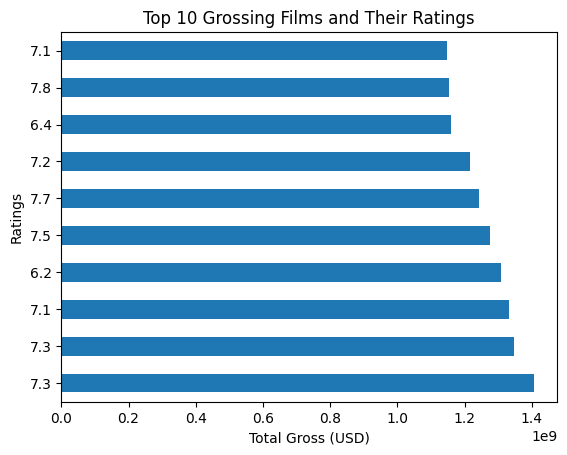

In [ ]:
# Top 10 grossing films with their ratings
ratings_gross = merged[['total_gross','imdb_rating' ]].sort_values(by='total_gross', ascending=False).head(10)

# Plot horizontal bar chart
plt.figsize=(12, 6)
ratings_gross.plot(kind='barh', x='imdb_rating', y='total_gross', title='Top 10 Grossing Films and Their Ratings', legend=False)
plt.xlabel('Total Gross (USD)')
plt.ylabel('Ratings')
plt.show()

From the chart we see that we do not need a highly rated movie for high grossing rather a rating between 6.2 - 8.

## Runtime against Gross

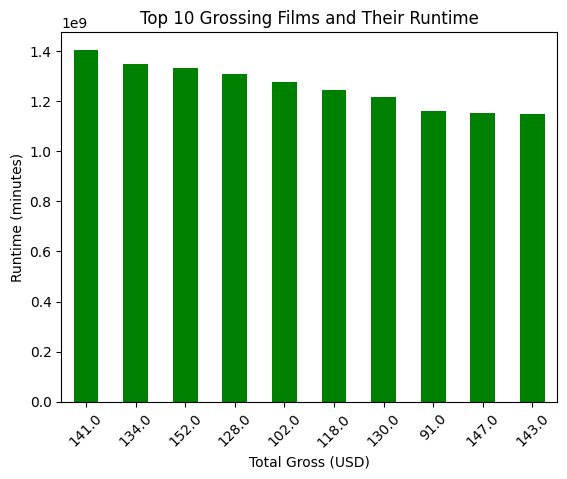

In [ ]:
# Top 10 grossing films with their runtime
runtime_gross = merged[['runtime_minutes', 'total_gross']].sort_values(by='total_gross',ascending=False).head(10)

# Plot into a barchart
plt.figsize=(12, 6)
runtime_gross.plot(kind='bar', x='runtime_minutes', y='total_gross', title='Top 10 Grossing Films and Their Runtime',color='green',legend=False)
plt.xlabel('Total Gross (USD)')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=45)
plt.show()

From this chart we are able to see that movies between 100 - 145 minutes is the sweetspot for a good grossing movie.

## Genre against Gross

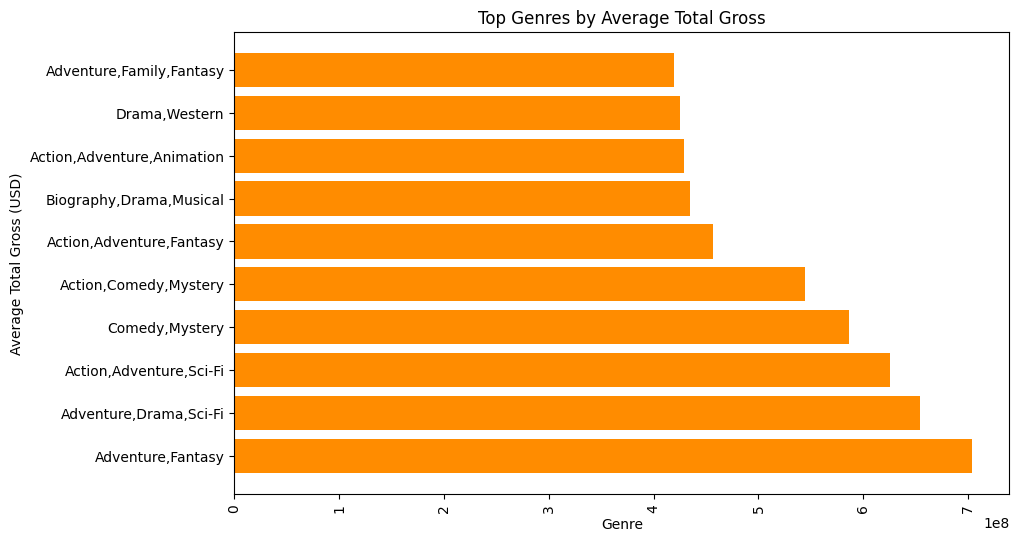

In [ ]:
# Step 1: Split genres by "|" and explode into multiple rows
merged['genre_list'] = merged['genres'].str.split('|') # adventure|action|Horror
genre_exploded = merged.explode('genre_list')

# Step 2: Group by genre and calculate average gross #.groupby(genre_list)
genre_group = genre_exploded.groupby('genre_list')['total_gross'].mean().sort_values(ascending=False).dropna()

# Step 3: Limit to top 10 genres
genre_group = genre_group.head(10)

# Step 4: Plot
plt.figure(figsize=(10,6))
plt.barh(genre_group.index, genre_group.values, color='darkorange')
plt.title("Top Genres by Average Total Gross")
plt.xlabel("Genre")
plt.ylabel("Average Total Gross (USD)")
plt.xticks(rotation=90)
plt.show()

The chart shows us that *Adventure* and *Action* movies tend to average high gross.

## Studio against gross

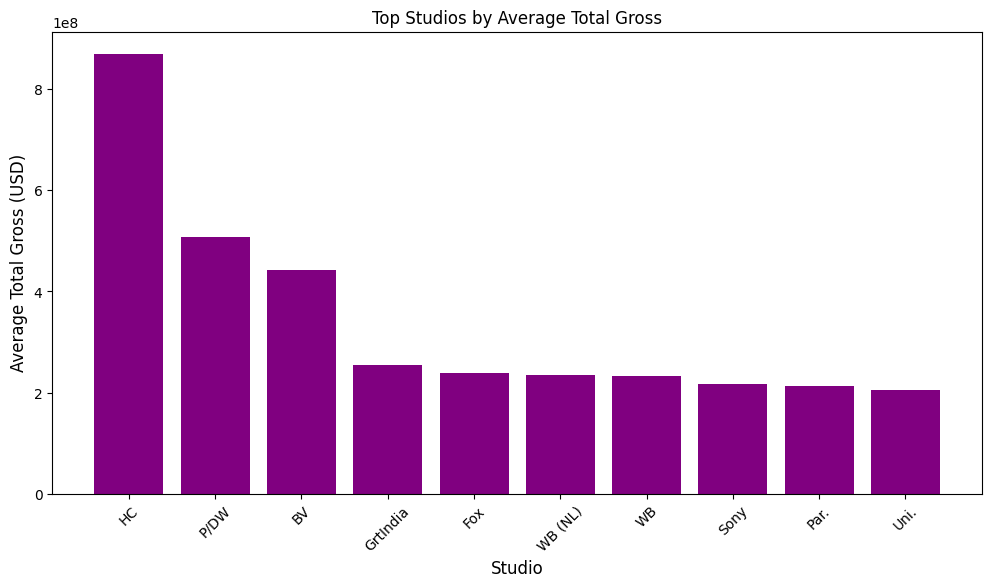

In [ ]:
# Step 1: Group by studio and calculate average gross
studio_group = merged.groupby('studio')['total_gross'].mean().sort_values(ascending=False).dropna()

# Step 2: Limit to top 10 studios
studio_group = studio_group.head(10)

# Step 3: Plot
plt.figure(figsize=(12,6))
plt.bar(studio_group.index, studio_group.values, color='purple')
plt.title("Top Studios by Average Total Gross")
plt.xlabel("Studio",fontsize=12)
plt.ylabel("Average Total Gross (USD)",fontsize=12)
plt.xticks(rotation=45)
plt.show()

The charts shows that **HC studios**(*HC* ) , **DreamWorks Pictures**(*P/DW* ) and **BV Studios**(*BV* ) consistently produce high grossing films.

## Studio against rating

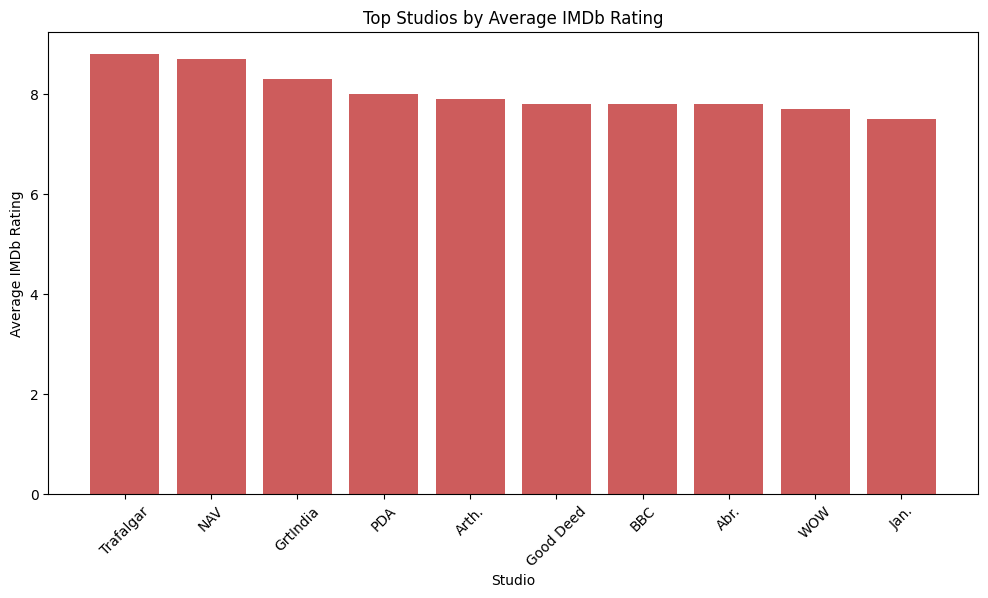

In [ ]:
# Step 1: Group by studio and calculate average IMDb rating
studio_rating = merged.groupby('studio')['imdb_rating'].mean().sort_values(ascending=False).dropna()

# Step 2: Limit to top 10 studios
studio_rating = studio_rating.head(10)

# Step 3: Plot
plt.figure(figsize=(12,6))
plt.bar(studio_rating.index, studio_rating.values, color='indianred')
plt.title("Top Studios by Average IMDb Rating")
plt.xlabel("Studio")
plt.ylabel("Average IMDb Rating")
plt.xticks(rotation=45)
plt.show()

From the chart we can conclude that studios like **Trafalgar** and **NAV** consistently produce highly rated films indicating high quality storytelling and viewer retention.

# Recommendations
From the visualisations we have done and the conclusions made from them, we can now answer our objectives as well give more information to Microsoft on the best way to launch their movie production business.

The recommendations we have that is backed by data are :
1. On studios to partner with, there are 2 paths they can take that depend on their vision and aim, which are :
    - If they are aiming to make the most money from their films, then studios such as ;  **HC studios** , **DreamWorks Pictures** and **BV Studios** generate the most gross from the films they produce.
    
    - If they want to build a reputation for quality cinema and viewer retention, then they should go for **Trafalgar** and **NAV** studios that consistently produce such high quality and rated films.

2. Movie genres that tend to make the most money are mainly *Action* and *Adventure* films which can also be paired with *Sci/Fi* to broaden the viewer interest.

3. As for the length of the films, they should aim for an average between 100 - 145 minutes because most movies that are within this range tend to make the most gross.

4. Rating that microsoft should aim for is not that high, rather movies that have a rating between 6.2 - 8 tend to be watched more and make a higher gross compared to ratings that are outside this range.